In [147]:
from sklearn.datasets import make_blobs
import sklearn as skl
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib as plt
from sklearn.svm import SVC
import eli5
from eli5.sklearn import PermutationImportance

In [148]:
df = pd.read_csv('C:/Users/heath/Desktop/Classwork/ClassW20/Resources/michelin_ML.csv')

In [149]:
df.describe()

,rating,review_count,price,latitude,longitude,stars,latBin,lonBin
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,4.170391,857.195531,3.743017,39.243213,-93.664574,1.301676,39.120670,-93.768715
std,0.314027,900.703171,0.541423,2.260092,21.896264,0.588798,2.251932,21.925961
min,3.500000,4.000000,2.000000,32.939903,-122.886470,1.000000,32.800000,-123.000000
25%,4.000000,298.000000,4.000000,37.786476,-122.143170,1.000000,37.600000,-122.200000
50%,4.000000,552.000000,4.000000,40.709860,-78.162080,1.000000,40.600000,-78.200000
75%,4.500000,1171.500000,4.000000,40.744689,-73.989655,1.000000,40.600000,-74.000000
max,5.000000,6199.000000,4.000000,41.969555,-73.923035,3.000000,41.800000,-74.000000


In [150]:
df['stars'].value_counts()[1]

137

In [151]:
X = df[['review_count', 'rating', 'price', 'latitude', 'longitude']]#0.77
y = df['stars']

In [152]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [153]:
 # Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [161]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 10


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

nn.summary()


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 20)                120       
_________________________________________________________________
dense_79 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 11        
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [162]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8448 - accuracy: 0.1642
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7896 - accuracy: 0.2239
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7426 - accuracy: 0.3060
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.3358
Epoch 5/100
1/5 [=====>........................] - ETA: 0s - loss: 0.6456 - accuracy: 0.4688
Epoch 00005: saving model to checkpoints\weights.05hdf5
5/5 [==============================] - 0s 12ms/step - loss: 0.6624 - accuracy: 0.3881
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.4104
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.4627
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5613 - accuracy: 0.5373
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5281 - accura

1/5 [=====>........................] - ETA: 0s - loss: -2.3124 - accuracy: 0.8750
Epoch 00065: saving model to checkpoints\weights.65hdf5
5/5 [==============================] - 0s 15ms/step - loss: -3.9484 - accuracy: 0.7388
Epoch 66/100
5/5 [==============================] - 0s 3ms/step - loss: -4.1333 - accuracy: 0.7388
Epoch 67/100
5/5 [==============================] - 0s 2ms/step - loss: -4.3498 - accuracy: 0.7388
Epoch 68/100
5/5 [==============================] - 0s 2ms/step - loss: -4.5789 - accuracy: 0.7388
Epoch 69/100
5/5 [==============================] - 0s 2ms/step - loss: -4.8013 - accuracy: 0.7388
Epoch 70/100
1/5 [=====>........................] - ETA: 0s - loss: -4.9474 - accuracy: 0.7500
Epoch 00070: saving model to checkpoints\weights.70hdf5
5/5 [==============================] - 0s 16ms/step - loss: -5.0452 - accuracy: 0.7388
Epoch 71/100
5/5 [==============================] - 0s 3ms/step - loss: -5.2999 - accuracy: 0.7388
Epoch 72/100
5/5 [========================

In [163]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: -1.1074e+01 - accuracy: 0.8444
Loss: -11.07380199432373, Accuracy: 0.8444444537162781


<AxesSubplot:>

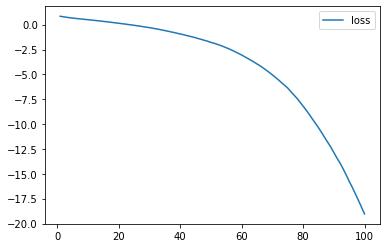

In [164]:
# Create a DataFrame containing training history

history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

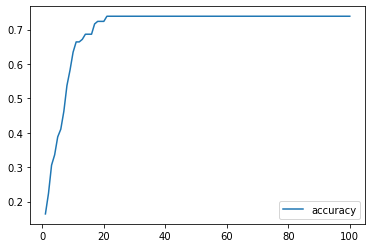

In [165]:
# Plot the accuracy
history_df.plot(y="accuracy")